# Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Clean Code
## Function and Results

# 01 Data import, Features name cleaning and first exploration
<div class="alert alert-block alert-info">
<b>info:</b> Here a function is defined. 
    The data is cleaned and prepared for a first analysis and then clean again until the complete function was built
</div>

In [2]:
#Function to clean the data
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Clean Variables
    #Fix weigth
    data_frame_input['WEIGHT'] = data_frame_input['WEIGHT'].str.rstrip('lbs').astype(int)
    #Fix heigth
    data_frame_input['HEIGHT'] = data_frame_input['HEIGHT'].str.replace('\'', '.').str.replace('"', '').astype(float)
    
    data_frame_input['IR'] = data_frame_input['IR'].str.replace('★', '').astype(float)
    data_frame_input['W/F'] = data_frame_input['W/F'].str.replace('★', '').astype(float)
    data_frame_input['SM'] = data_frame_input['SM'].str.replace('★', '').astype(float)
    
    #Fix Money related variables
    ## multiply the numeric values by 1 million or 1 thousand, depending on whether the value represents millions or thousands of euros
    data_frame_input["VALUE"] = data_frame_input["VALUE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
   
    #WAGE
    data_frame_input["WAGE"] = data_frame_input["WAGE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
  
    
    #RELEASE_CLAUSE
    data_frame_input["RELEASE_CLAUSE"] = data_frame_input["RELEASE_CLAUSE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

    
    #Fixed values with a + as a , separator
    cols_to_replace = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']
    #Some values contains a -
    #data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].str.replace('-'', '').str.replace('"', '')
    data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].apply(lambda x: x.str.replace('+', '.'))

    #Convert HITS to numeric
    # Remove the "K" character and convert to numeric
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'].str.replace('K', '', regex=False)) * 1000
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'])
    
    #Convert ID to string
    data_frame_input['ID'] = data_frame_input['ID'].astype(str)
    
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n\n\n")
    #Put 0 in those which have nulls.
    #for  Column_to_change in null_columns:
        #df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    print("Categorical columns that contains null values: \n ",null_columns, "\n nulls have been replaced with Unkown label\n\n\n")
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    #print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    #data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Rename columns
    data_frame_input = data_frame_input.rename(columns={'OVA': 'OVERALL', 'BOV': 'BEST_OVERALL','LS': 'LEFT_STRIKER','ST':'LEFT_STRIKER',
                           'RS':'RIGHT_STRIKER','LW':'LEFT_WING','LF':'LEFT_FORWARD','CF':'CENTRAL_FORWARD','RF':'RIGHT_FORWARD',
                            'RW':'RIGHT_WING','LAM':'LEFT_ATTACKING_MIDFIELDER','CAM':'CENTRAL_ATTACKING_MIDFILEDER','RAM':'RIGHT_ATTACKING_MIDFIELDER',
                           'LM':'LEFT_MIDFIELDER','LCM':'LEFT_CENTRAL_MIDFIELDER','CM':'CENTRAL_MIDFIELDER','RCM':'RIGHT_CENTRAL_MIDFIELDER','RM':'RIGHT_MIDFIELDER',
                           'LWB':'LEFT_WING_BACK','LDM':'LEFT_DEFFENSIVE_MIDFIELDER','CDM':'CENTRAL_DEFENSIVE_MIDFIELDER','RDM':'RIGHT_DEFENSIVE_MIDFIELDER',
                           'RWB':'RIGHT_WING_BACK','LB':'LEFT_BACK','LCB':'LEFT_CENTRAL_BACK','CB':'CENTRAL_BACK','RCB':'RIGHT_CENTRAL_BACK','RB':'RIGHT_BACK',
                           'GK':'GOAL_KEEPER','BP':'BEST_POSITION','FK_ACCURACY':'FREE_KICK_ACCURACY','A/W':'ATTACKING_WORK_RATE','D/W':'DEFENSIVE_WORK_RATE','SM':'SKILL_MOVES','W/F':'WEEK_FOOT_ABILITY','SHO':'SHOOTING',
                           'POT':'POTENTIAL'})
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('\n\n\nDescription of output data frame \n')
    data_frame_output.info(
    )
    return data_frame_output

Import the data and apply the function

In [3]:
#Here I use the function created to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./fifa21_male2.csv')
#data_frame_input.shape
df_cleaned=DATA_FRAME_CLEAN(data_frame_input)
df_cleaned.sample(10)

The size for this data frame is:  (17125, 107)



Numerical columns that contains null values: 
  ['VOLLEYS', 'CURVE', 'AGILITY', 'BALANCE', 'JUMPING', 'INTERCEPTIONS', 'POSITIONING', 'VISION', 'COMPOSURE', 'SLIDING_TACKLE', 'HITS'] 



Categorical columns that contains null values: 
  ['CLUB', 'POSITION', 'CLUB_LOGO', 'JOINED', 'LOAN_DATE_END', 'A/W', 'D/W'] 
 nulls have been replaced with Unkown label






Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, AGE to GENDER
dtypes: float64(15), int32(4), int64(44), object(44)
memory usage: 13.7+ MB


AGE  OVERALL  BEST_OVERALL  POTENTIAL  HEIGHT  WEIGHT  GROWTH    VALUE  \
7264    23       67            67         75    6.20     161       8   875000   
5280    28       73            73         73    6.00     154       0  4000000   
3853    27       70            71         70    5.10     165       0  1800000   
16989   18       60            61         80    5.11     159      20   400000   
3994    32       70            71         70    5.10     148       0  1300000   
7382    31       71            71         71    6.20     192       0  1800000   
5544    27       63            63         63    5.11     179       0   325000   
8622    24       69            70         76    5.10     150       7  1300000   
7291    27       70            71         71    5.90     161       1  1800000   
4184    27       67            69         70    5.11     165       3   825000   

        WAGE  RELEASE_CLAUSE  ATTACKING  CROSSING  FINISHING  \
7264    2000         1400000         93        16         16   
5280   60000         7600000        332        76         66   
3853    5000         2700000        324        69         64   
16989    500         1000000        215        44         29   
3994    7000         1700000        327        67         68   
7382   21000         3100000        243        37         40   
5544   12000          618000        259        53         44   
8622    7000         2900000        272        64         40   
7291    7000         2900000        316        74         59   
4184    5000         1300000        305        60         48   

       HEADING_ACCURACY  SHORT_PASSING  VOLLEYS  SKILL  DRIBBLING  CURVE  \
7264                 18             31     12.0     94         14   20.0   
5280                 56             75     59.0    379         80   79.0   
3853                 55             79     57.0    324         73   61.0   
16989                56             52     34.0    229         50   42.0   
3994                 57             73     62.0    354         70   71.0   
7382                 71             62     33.0    287         45   59.0   
5544                 56             62     44.0    274         65   59.0   
8622                 68             65     35.0    286         66   47.0   
7291                 52             67     64.0    346         71   73.0   
4184                 61             70     66.0    286         60   51.0   

       FREE_KICK_ACCURACY  LONG_PASSING  BALL_CONTROL  MOVEMENT  ACCELERATION  \
7264                   19            18            23       234            48   
5280                   74            69            77       352            72   
3853                   51            66            73       361            70   
16989                  34            50            53       306            65   
3994                   72            68            73       356            78   
7382                   74            57            52       224            38   
5544                   36            51            63       355            76   
8622                   48            58            67       351            71   
7291                   64            70            68       391            79   
4184                   39            67            69       355            71   

       SPRINT_SPEED  AGILITY  REACTIONS  BALANCE  POWER  SHOT_POWER  JUMPING  \
7264             49     34.0         60     43.0    211          44     65.0   
5280             69     75.0         63     73.0    313          71     58.0   
3853             72     74.0         70     75.0    329          73     52.0   
16989            63     59.0         54     65.0    246          38     61.0   
3994             70     71.0         67     70.0    338          66     52.0   
7382             55     32.0         68     31.0    354          73     59.0   
5544             79     69.0         60     71.0    311          57     71.0   
8622             70     71.0         65  

# 02 Exploration
## Here I separate numerical and categorical features. 
 - df_numeric
 - df_object
### The next step is to show results for Categorical and Numerical features

In [4]:
df_numeric=df_cleaned.select_dtypes(include=["float", "int"])
df_object=df_cleaned.select_dtypes(include=[object]) 

#Drop ID
#df_numeric.drop(columns='ID')#Why not working?????????????????????????????????????????????????
#df_numeric.sample(2)

#### Categorical features
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see unique values and a count of how many records in each category are. 
</div>

In [5]:
#Check unique values for each categorical value
for column in df_object.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  ID  has  17125  categories 
 The single values are:  ['2' '16' '27' ... '259091' '259101' '259105']
Here the detail: 
 2         1
239575    1
239523    1
239529    1
239540    1
         ..
212513    1
212516    1
212518    1
212519    1
259105    1
Name: ID, Length: 17125, dtype: int64



This feature  NAME  has  16176  categories 
 The single values are:  ['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
Here the detail: 
 J. Rodríguez       10
A. Traoré           8
J. Rojas            8
J. Jones            7
Paulinho            7
                   ..
F. Ondoa            1
K. Opare            1
T. Abe              1
N. Stark            1
Pablo Rodríguez     1
Name: NAME, Length: 16176, dtype: int64



This feature  NATIONALITY  has  167  categories 
 The single values are:  ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina'

AttributeError: 'DataFrame' object has no attribute 'unique'

#### Numerical features

#### Histograms
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the histogram of the different numeric variables 
</div>

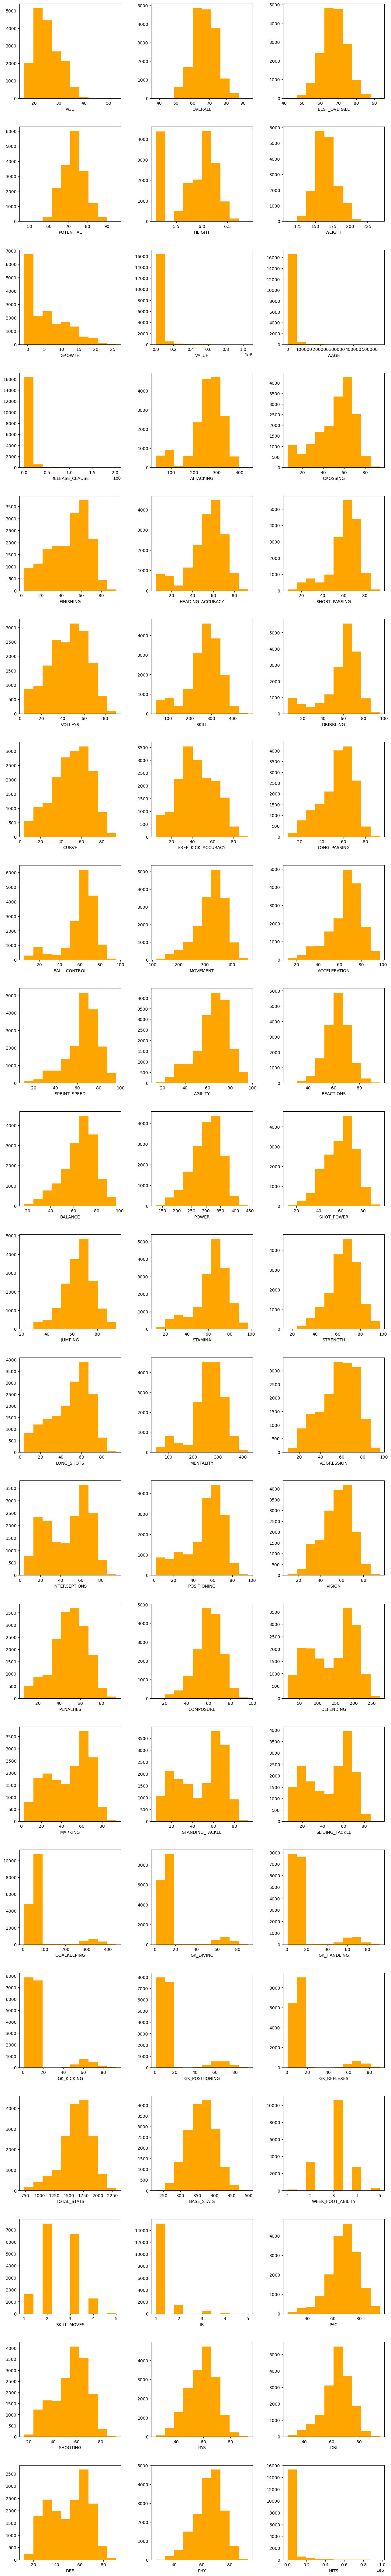

In [6]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each histogram in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.hist(df_numeric[column], color='orange')
    ax.set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#### Distributions
#### Histograms
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the distributions of the different numeric variables 
</div>

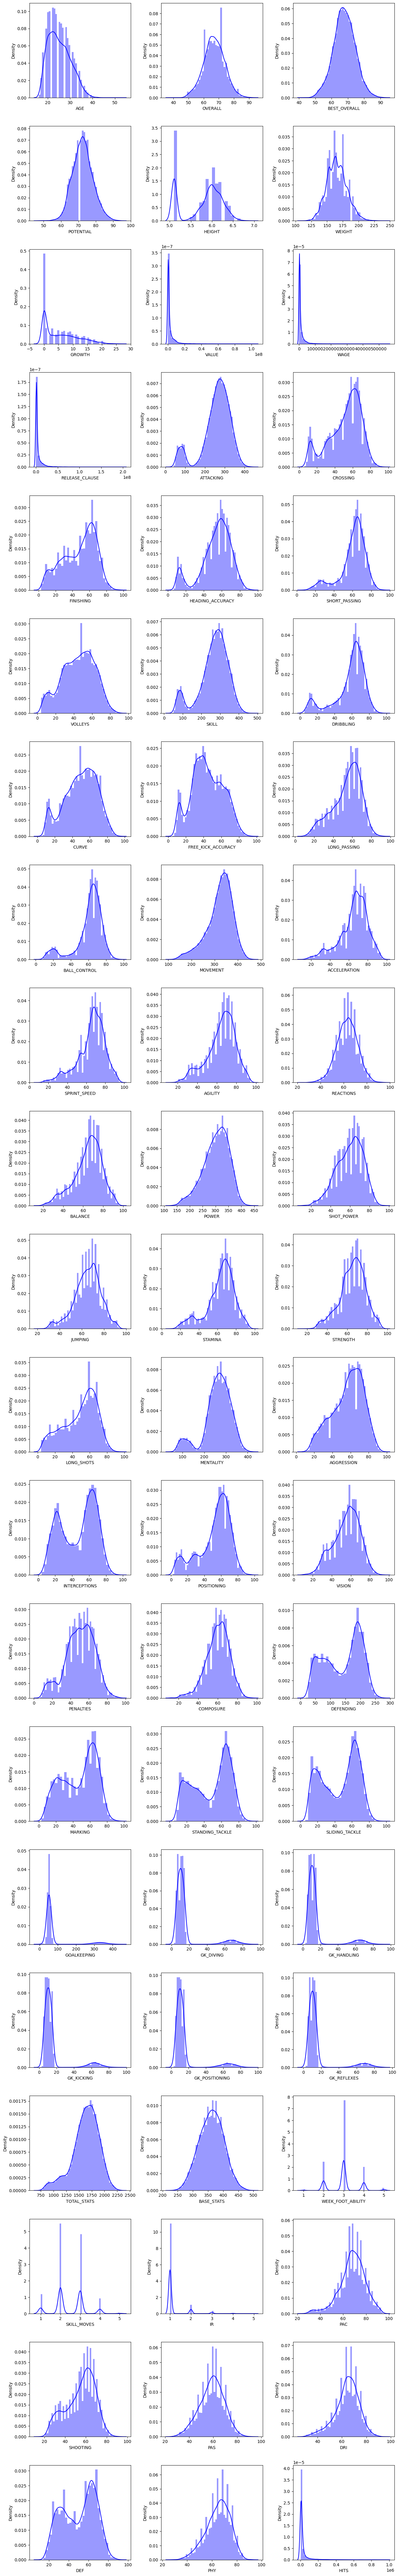

In [7]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#### boxplots
#### Histograms
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the boxplots of the different numeric variables 
</div>

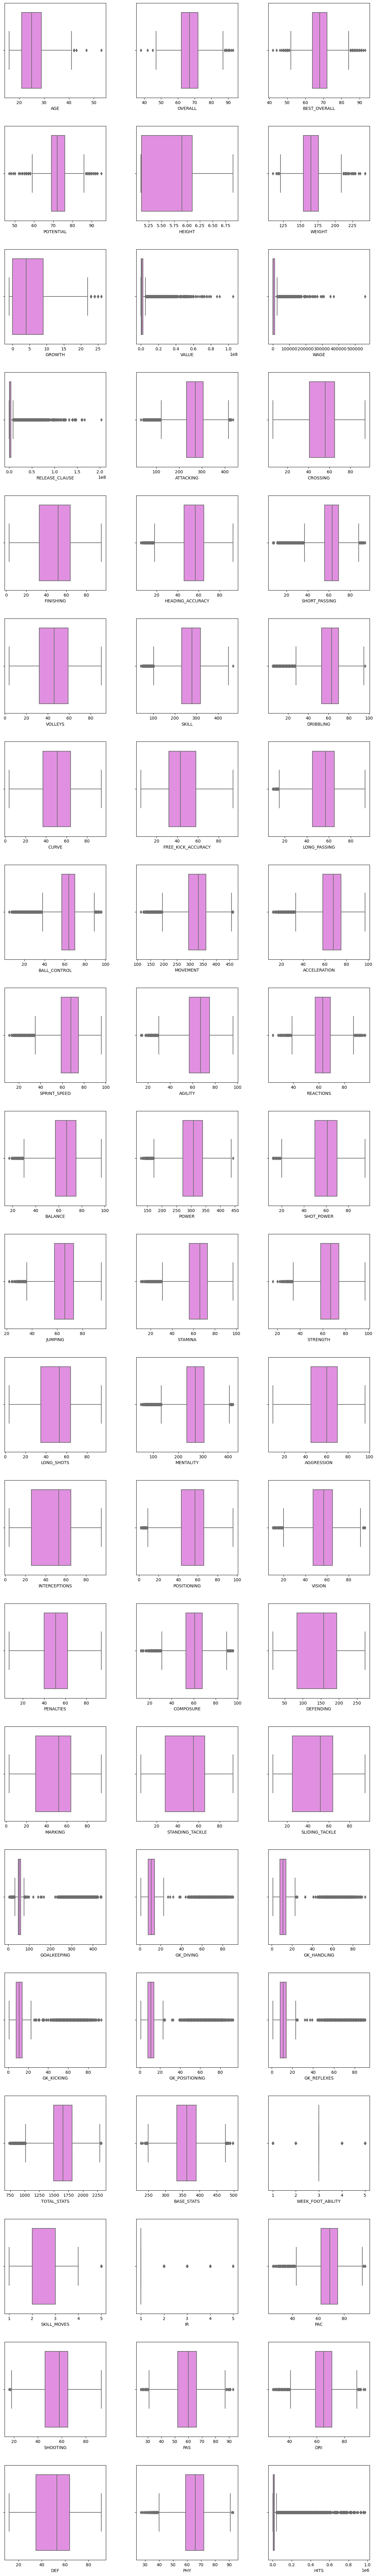

In [8]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

Details about the limits and the outlyers for each numeric variable
<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see the details on the different numeric variables 
</div>

In [9]:
for column in df_numeric.columns:
    iqr = np.percentile(df_numeric[column],75) - np.percentile(df_numeric[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric.loc[(df_numeric[column]>upper_limit) | (df_numeric[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  AGE  | Upper limit:  41.0  | Lower limit:  9.0
Number of exclusions would be  13

Feature name:  OVERALL  | Upper limit:  87.0  | Lower limit:  47.0
Number of exclusions would be  32

Feature name:  BEST_OVERALL  | Upper limit:  84.0  | Lower limit:  52.0
Number of exclusions would be  251

Feature name:  POTENTIAL  | Upper limit:  86.5  | Lower limit:  58.5
Number of exclusions would be  298

Feature name:  HEIGHT  | Upper limit:  7.584999999999999  | Lower limit:  3.6250000000000013
Number of exclusions would be  0

Feature name:  WEIGHT  | Upper limit:  209.0  | Lower limit:  121.0
Number of exclusions would be  82

Feature name:  GROWTH  | Upper limit:  22.5  | Lower limit:  -13.5
Number of exclusions would be  51

Feature name:  VALUE  | Upper limit:  5437500.0  | Lower limit:  -2662500.0
Number of exclusions would be  2304

Feature name:  WAGE  | Upper limit:  26000.0  | Lower limit:  -14000.0
Number of exclusions would be  1751

Feature name:  RELEASE_CLAUSE  | U

---
#### Correlations

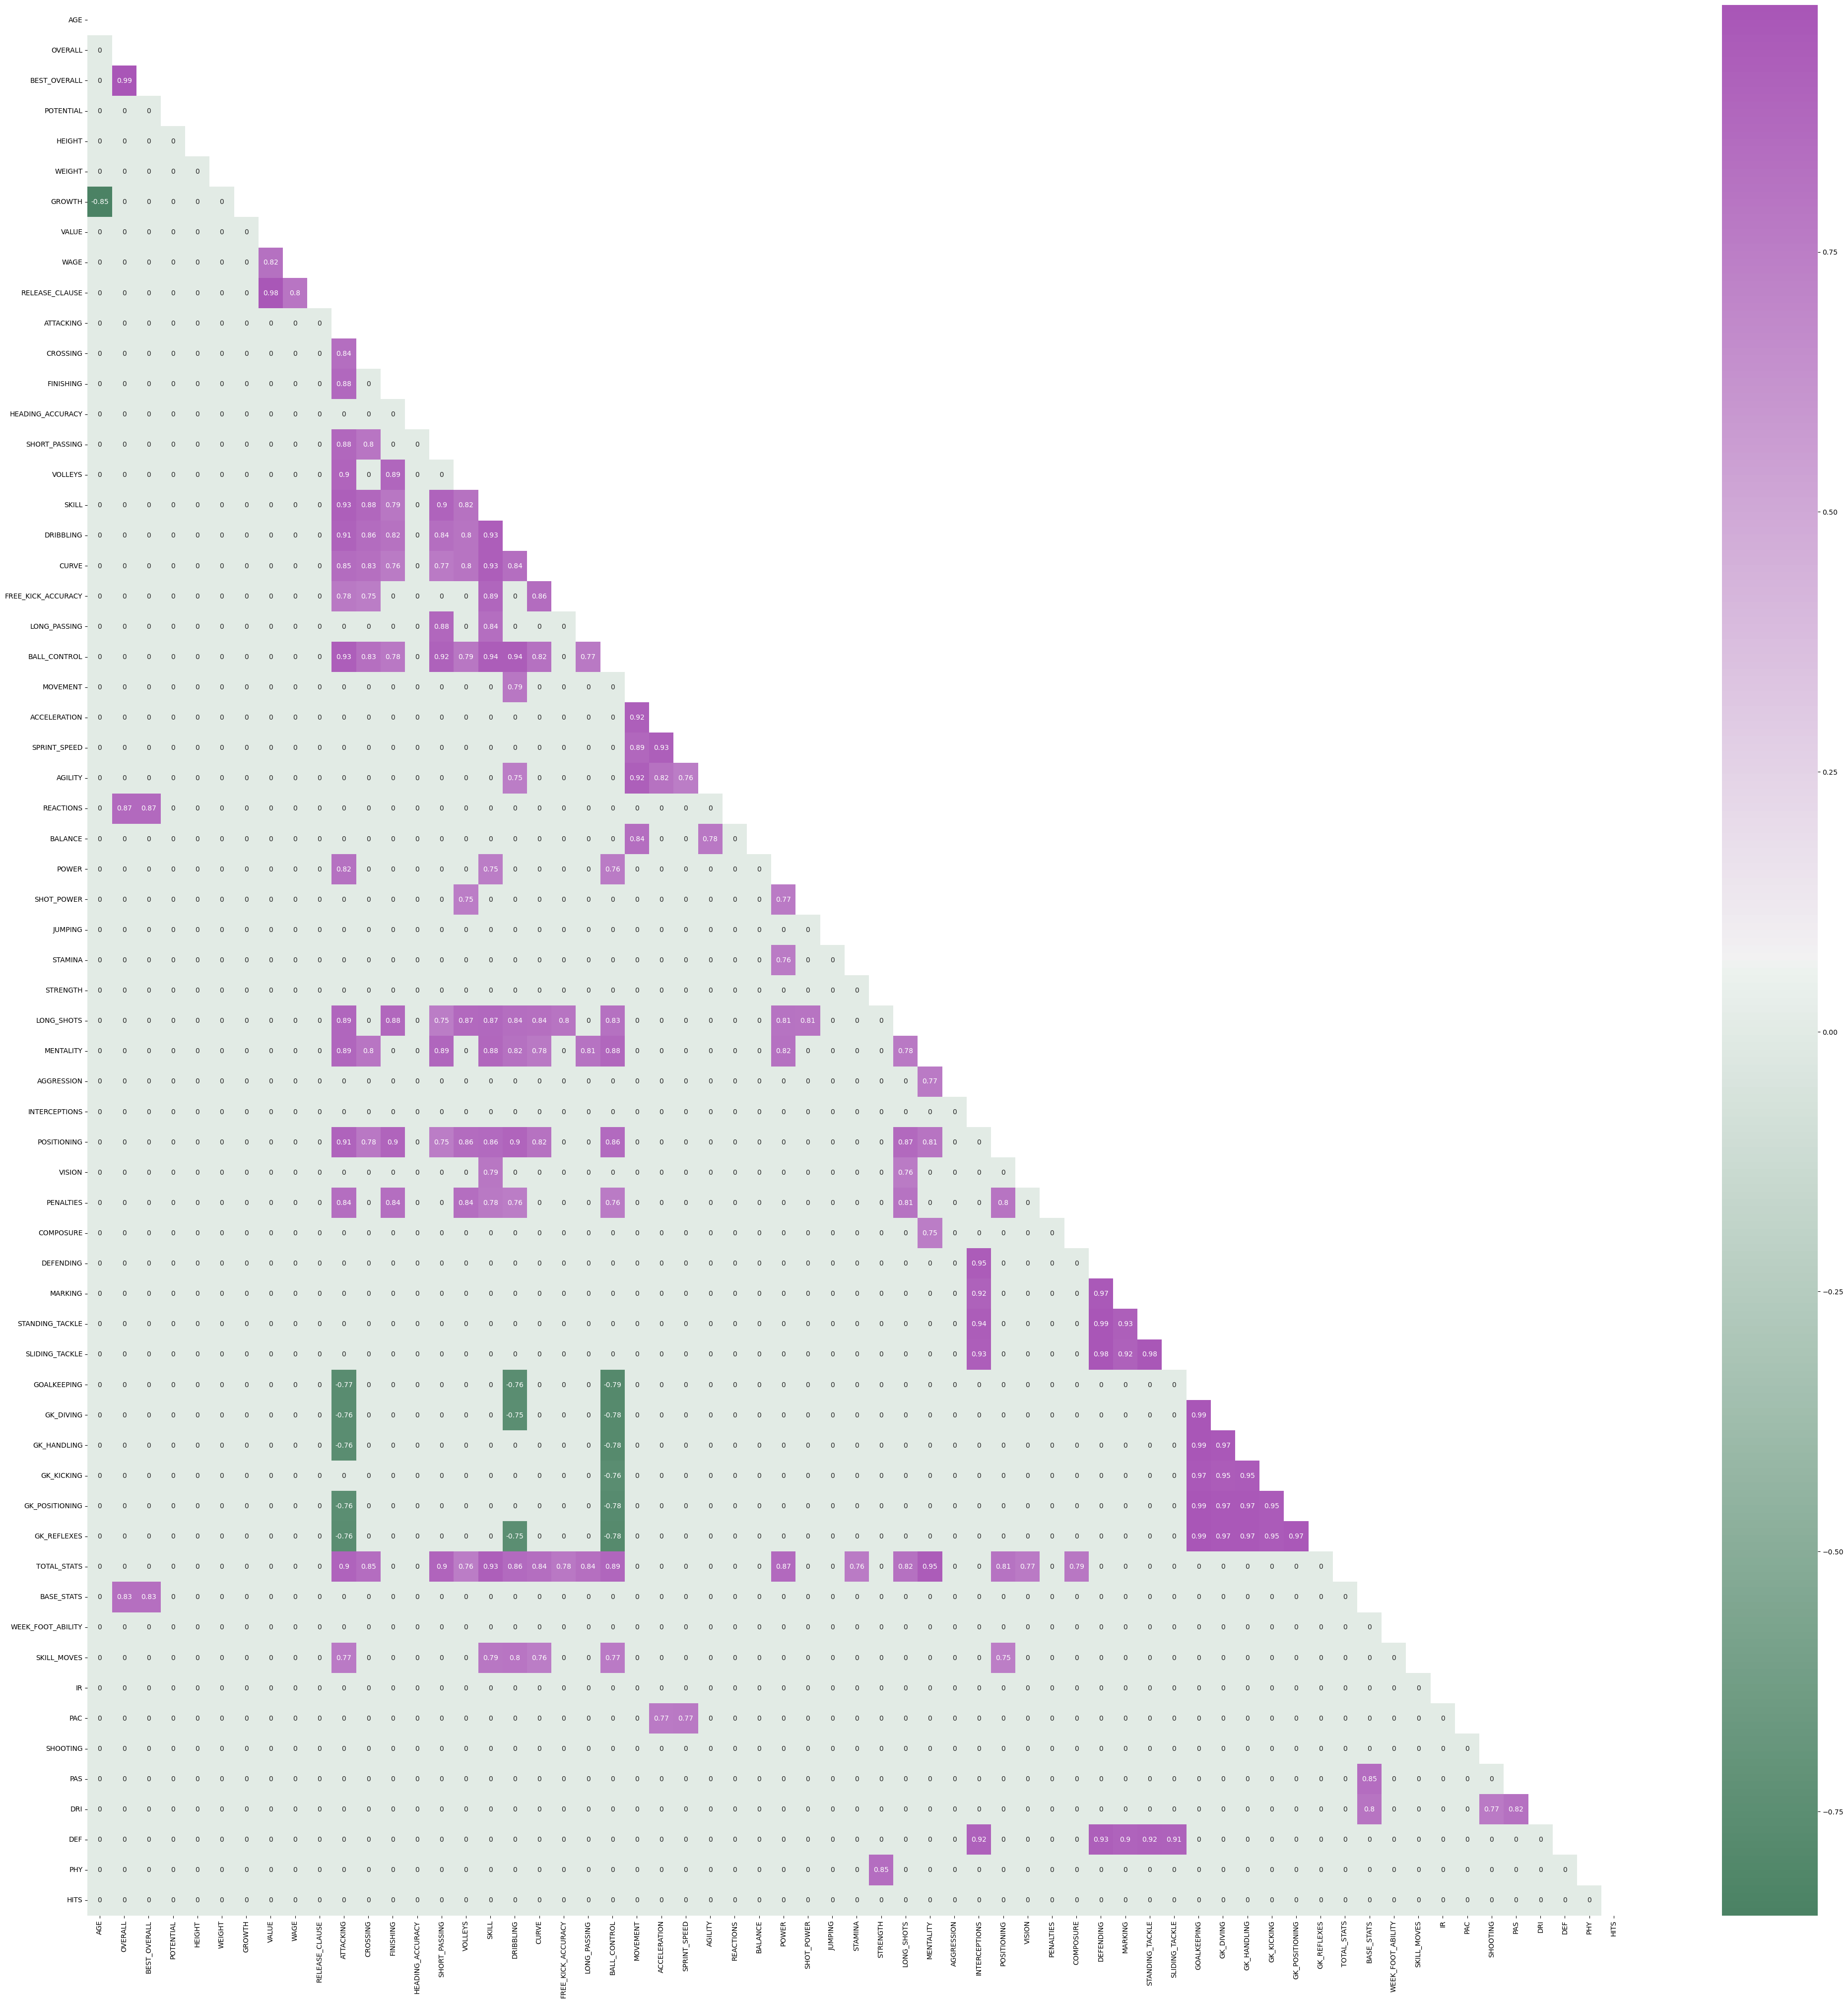

In [10]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric.corr()
correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50, 50))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

---
<div class="alert alert-block alert-info">
<b>Important:</b> Here we start to prepare the data for the training 
</div>

##  Select variables relevant for the model
### Categoricals
    -BEST_POSITION
    -FOOT
### Numericals
    -AGE
    -OVERALL
    -VALUE
    -POTENTIAL
    -HEIGHT
    -WEIGHT
    -GROWTH
    

<div class="alert alert-block alert-success">
<b>Tip:</b> To a detail explanations about the decisions made. Check excel 
</div>

In [18]:
df_object_selected=df_object[['BEST_POSITION','FOOT']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH']]
#df_MODEL=pd.concat([df_object_selected, df_numeric_selected], axis=1)
#df_MODEL.reset_index()
#df_MODEL.shape

---
#### Check unique values in Selected Categorical features
>We don´t want to have so many unique values. Columns are costly. Max 2,3 unique values per feature

<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see unique values and a count of how many records in each category are. 
</div>

In [14]:
#Check unique values for each categorical value
for column in df_object_selected.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  BEST_POSITION  has  15  categories 
 The single values are:  ['LWB' 'CM' 'CAM' 'ST' 'RW' 'CB' 'CF' 'GK' 'CDM' 'RWB' 'LB' 'LM' 'RM' 'RB'
 'LW']
Here the detail: 
 CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: BEST_POSITION, dtype: int64



This feature  FOOT  has  2  categories 
 The single values are:  ['Left' 'Right']
Here the detail: 
 Right    12906
Left      4219
Name: FOOT, dtype: int64





---
#### Check  values in Selected Numerical features
>We need to test which distribution the variables have and decide the transformation we use. 
>We should remove fetautures with a strong correlation for a linear regression
>In case of a logaritmit regression we don´t need to transform variables

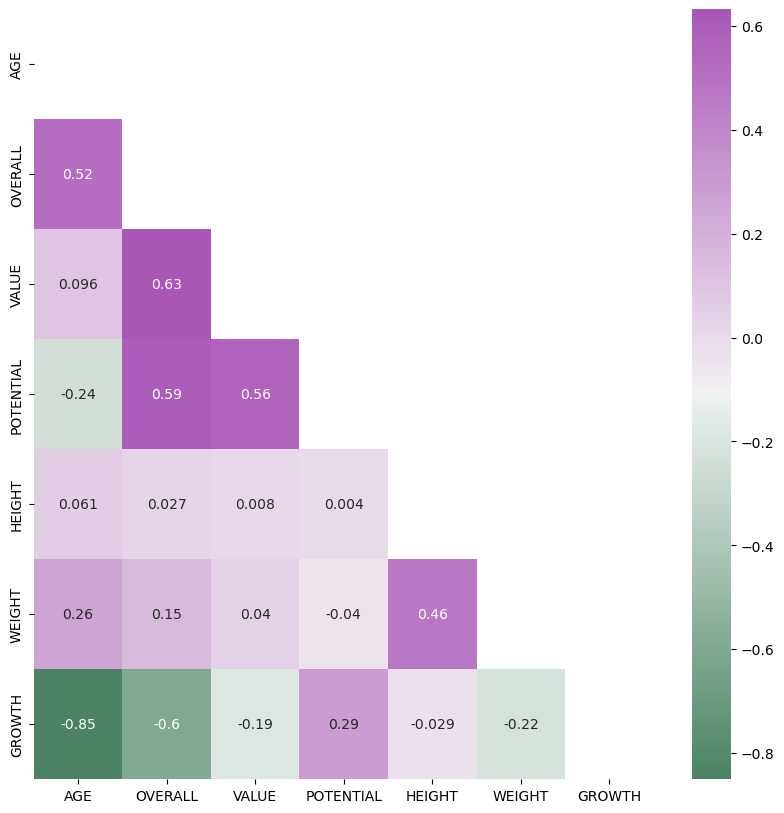

In [13]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric_selected.corr()
#correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

Explanations for this graph: 
>We have selected variables with low correlation
>Please check if we need Growth is correlated with age. Not bigger than 0.9 it should be ok. 
>Value is our target

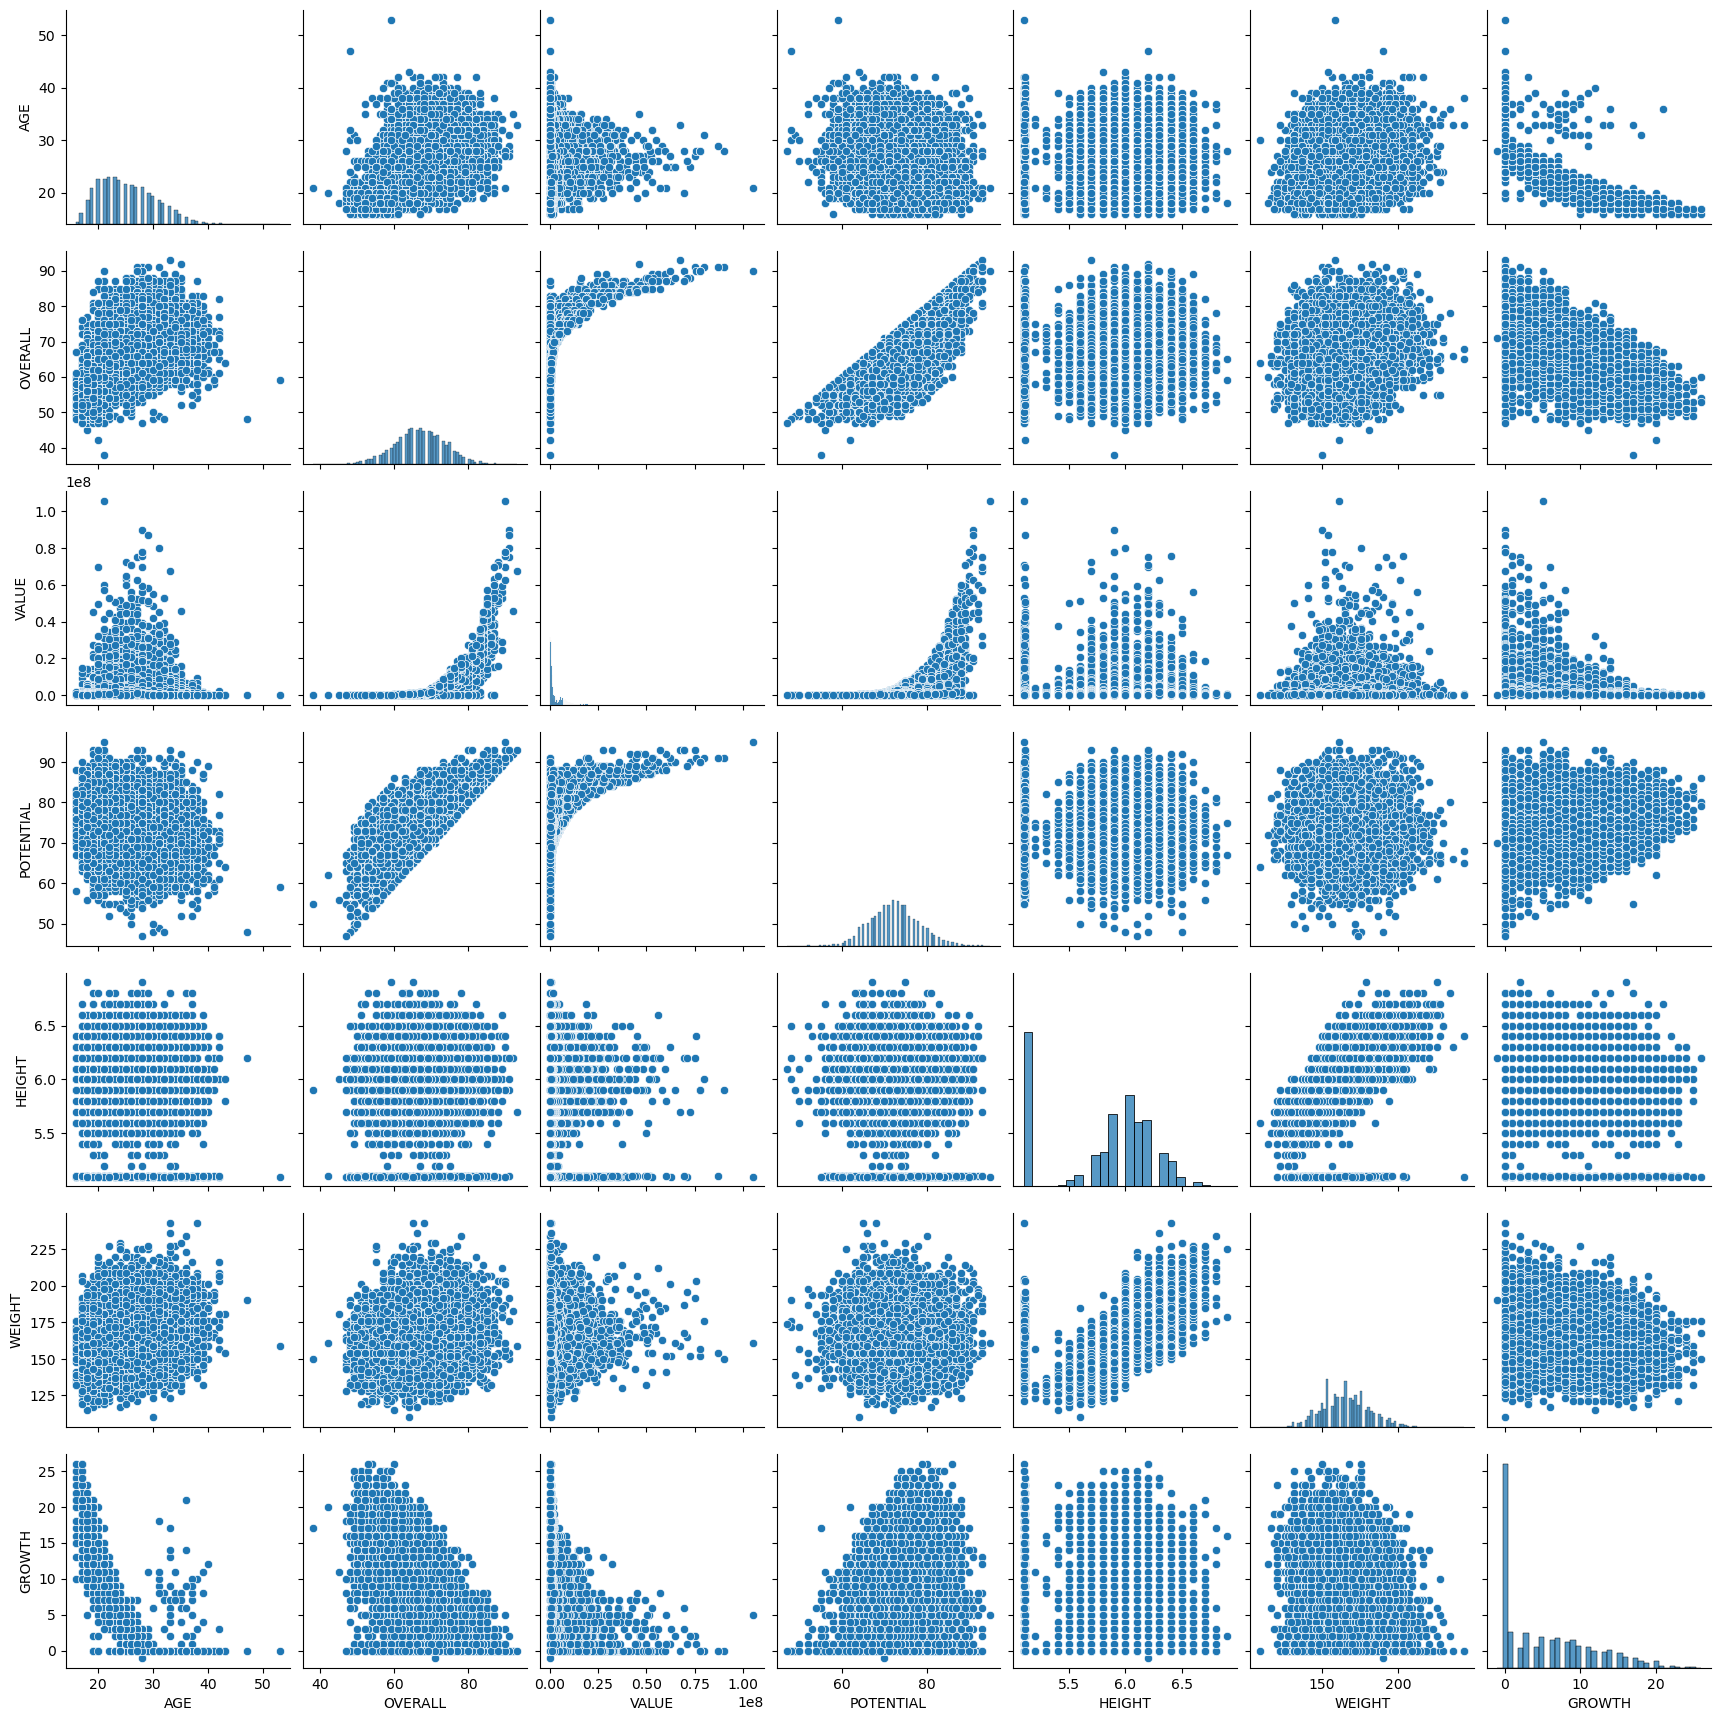

In [15]:
sns.pairplot(df_numeric_selected)

# 03 Process / Transformations

## Encoding


We Encode the BEST_POSITION feature to keep the most relevant categories. In total they are four

In [20]:
# Create a dictionary that maps old categories to new categories
bp_mapping = {
    "GK": "GOAL KEEPER",
    "ST": "FORWARD",
    "CF": "FORWARD",
    "RW": "FORWARD",
    "LW": "FORWARD",
    "CAM": "MIDFIELD",
    "CM": "MIDFIELD",
    "RM": "MIDFIELD",
    "LM": "MIDFIELD",
    "CDM": "MIDFIELD",
    "CB": "DEFENSIVE",
    "LWB": "DEFENSIVE",
    "RWB": "DEFENSIVE",
    "LB": "DEFENSIVE",
    "RB": "DEFENSIVE",
}
# Use the replace() method to map old categories to new categories
df_object_selected["BEST_POSITION"] = df_object_selected["BEST_POSITION"].replace(bp_mapping)
#df_object_selected.head()
df_object_selected["BEST_POSITION"].unique()

array(['DEFENSIVE', 'MIDFIELD', 'FORWARD', 'GOAL KEEPER'], dtype=object)

In [21]:
df_object_encoded = pd.get_dummies(df_object_selected, drop_first=False)
df_object_encoded.sample(5)

BEST_POSITION_DEFENSIVE  BEST_POSITION_FORWARD  \
12569                        0                      1   
5407                         0                      0   
16088                        0                      1   
1501                         1                      0   
3309                         0                      1   

       BEST_POSITION_GOAL KEEPER  BEST_POSITION_MIDFIELD  FOOT_Left  \
12569                          0                       0          0   
5407                           0                       1          1   
16088                          0                       0          0   
1501                           0                       0          0   
3309                           0                       0          0   

       FOOT_Right  
12569           1  
5407            0  
16088           1  
1501            1  
3309            1

## Scalers

<div class="alert alert-block alert-danger">
<b>Danger:</b> We separate first target and the rest of the variables. Is this true?
</div>

The distributions and the outliers for the selected variables are plotted here. This helps us to decide if we need a normalization or a standarization

In [47]:
#I split VALUEt and the rest of numerical values to apply the scalers
X_Target=df_numeric_selected['VALUE']
df_numeric_Transformed=df_numeric_selected.drop(columns='VALUE')
df_numeric_Transformed.sample(4)

AGE  OVERALL  POTENTIAL  HEIGHT  WEIGHT  GROWTH
9753    20       66         82     6.1     165      16
13349   28       75         75     6.2     172       0
1954    26       64         65     5.9     161       1
16314   21       61         69     5.1     170       8

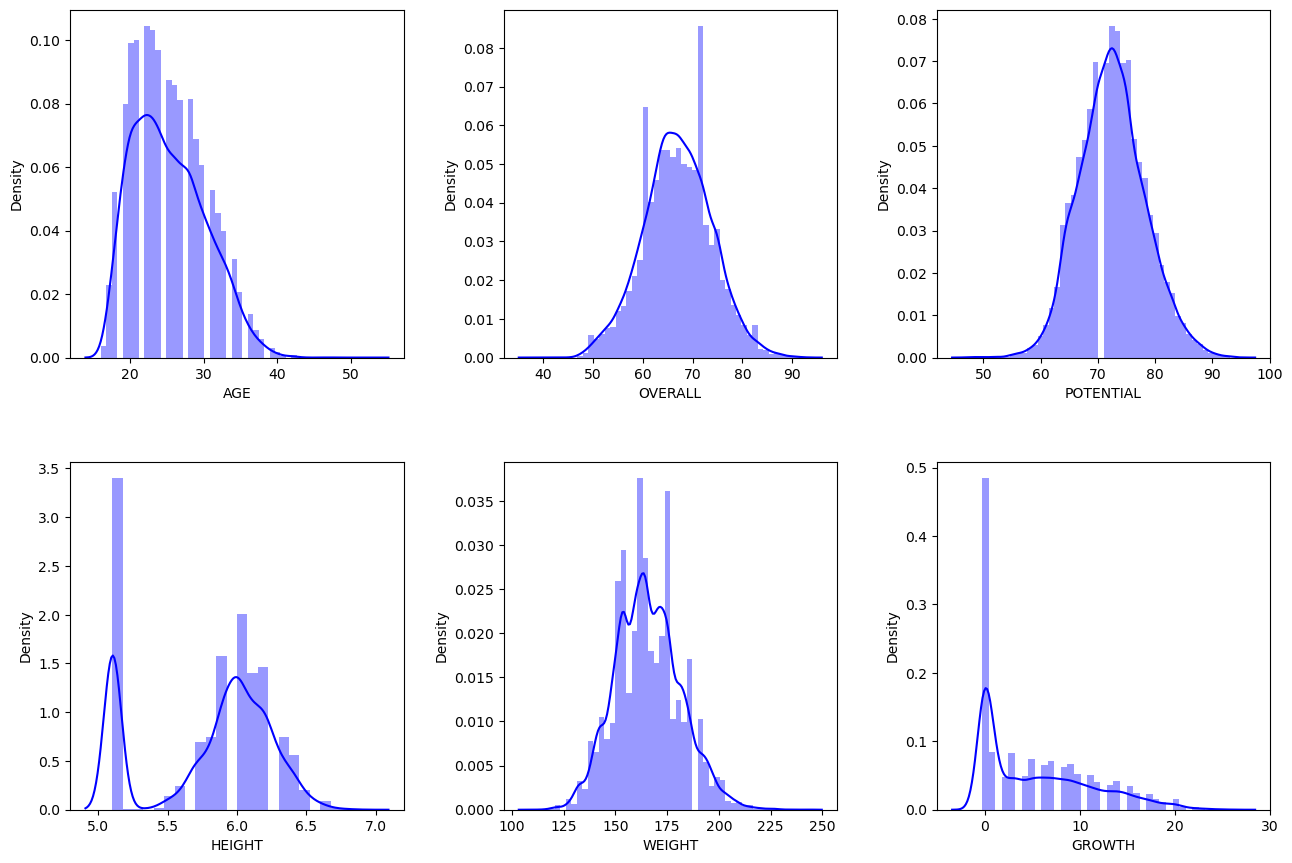

In [25]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_Transformed[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

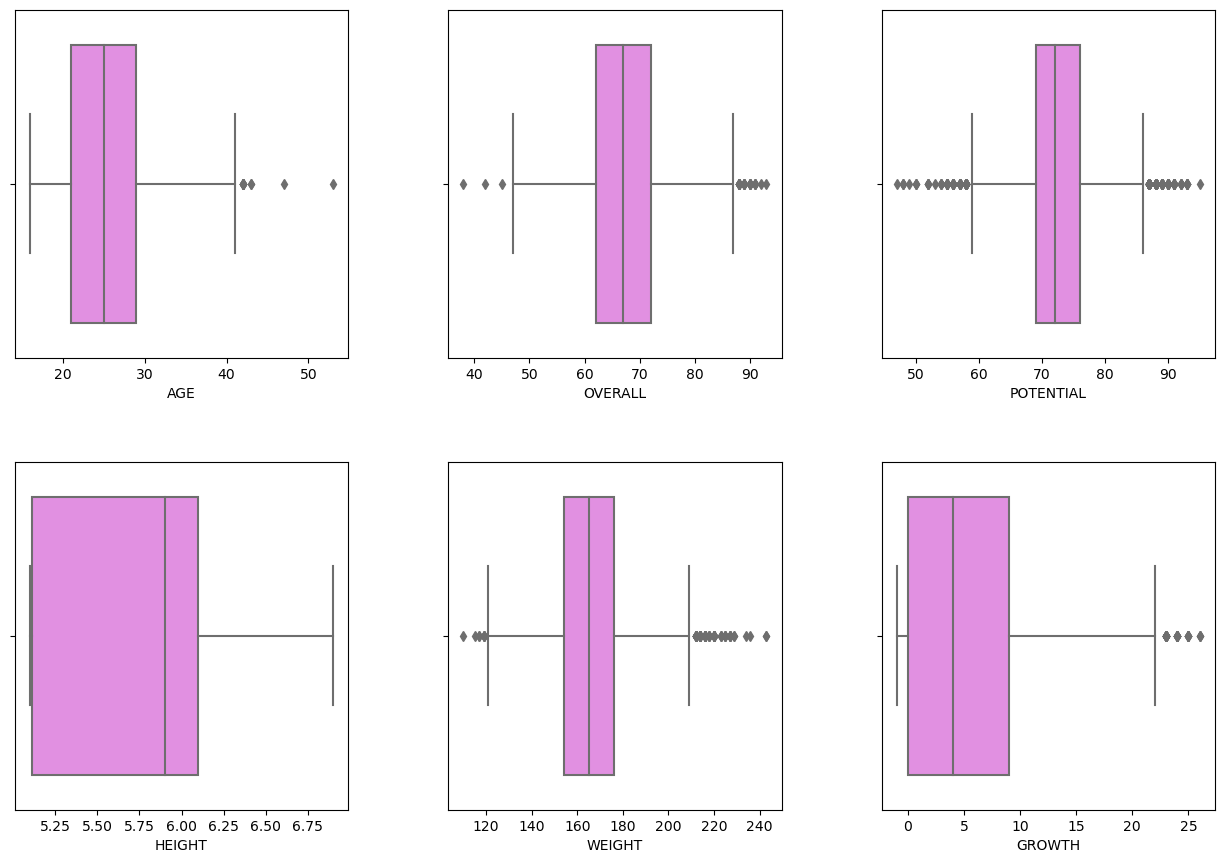

In [26]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric_Transformed[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [27]:
for column in df_numeric_Transformed.columns:
    iqr = np.percentile(df_numeric_Transformed[column],75) - np.percentile(df_numeric[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric_Transformed[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric_Transformed[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric_Transformed.loc[(df_numeric[column]>upper_limit) | (df_numeric[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  AGE  | Upper limit:  41.0  | Lower limit:  9.0
Number of exclusions would be  13

Feature name:  OVERALL  | Upper limit:  87.0  | Lower limit:  47.0
Number of exclusions would be  32

Feature name:  POTENTIAL  | Upper limit:  86.5  | Lower limit:  58.5
Number of exclusions would be  298

Feature name:  HEIGHT  | Upper limit:  7.584999999999999  | Lower limit:  3.6250000000000013
Number of exclusions would be  0

Feature name:  WEIGHT  | Upper limit:  209.0  | Lower limit:  121.0
Number of exclusions would be  82

Feature name:  GROWTH  | Upper limit:  22.5  | Lower limit:  -13.5
Number of exclusions would be  51


>Only HEIGHT and GROWTH have a distribution slightly different from a normal. The rest of variables have an appeareance of a normal
>We see that there are some outliers in the variables even if they are not many we keep it.
>Should we exclude 13 from AGE? 

>A standarization is chosen to be performed as a transformation. 

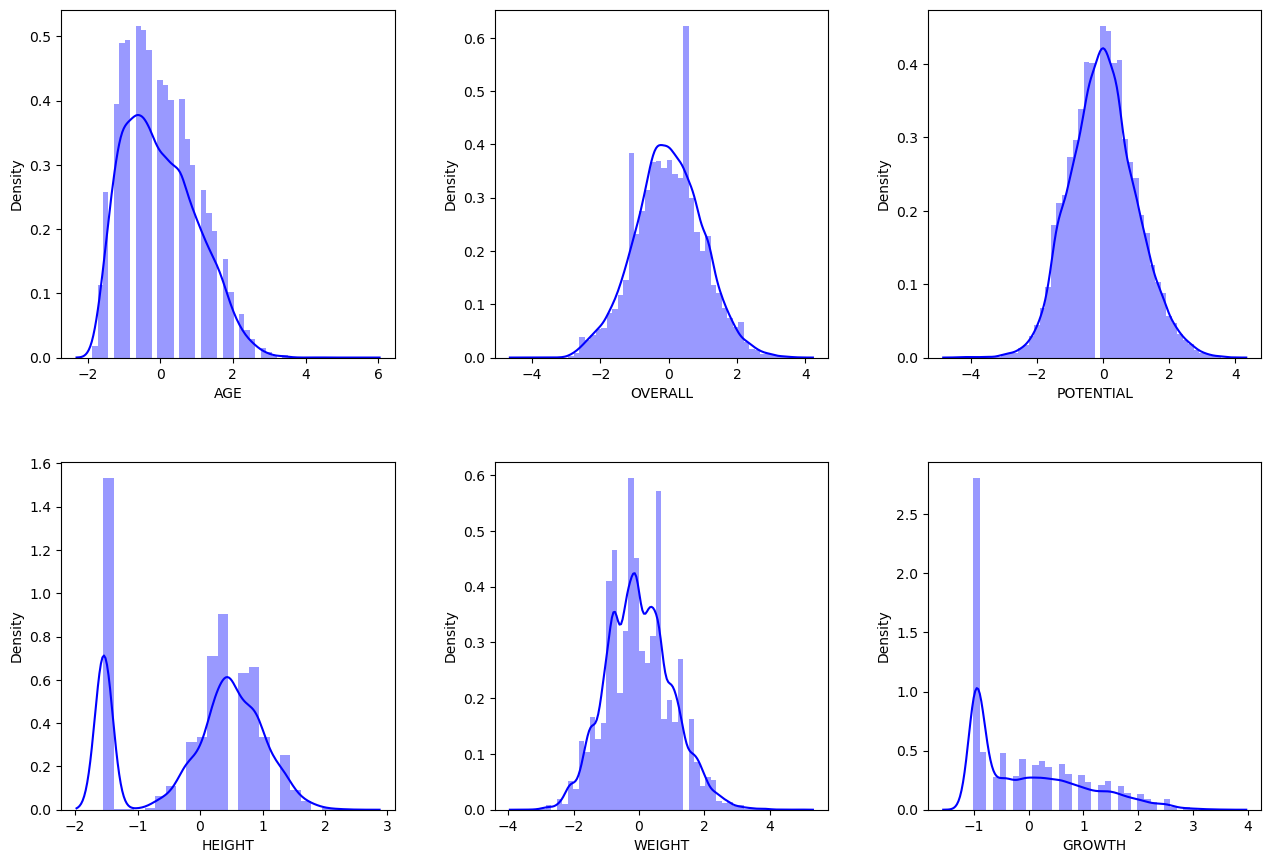

In [38]:
#Show the distributions in as a Standarized distribution. 
##There are different methods to do this transformation
#I use Standarization Standar_scaler to put the mean in 0

transformer = StandardScaler().fit(df_numeric_Transformed)
df_numeric_Transformed_2 = transformer.transform(df_numeric_Transformed)
df_numeric_Transformed = pd.DataFrame(df_numeric_Transformed_2, columns=df_numeric_Transformed.columns)

# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid


# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_Transformed[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [39]:
df_numeric_Transformed.sample(5)

AGE   OVERALL  POTENTIAL    HEIGHT    WEIGHT    GROWTH
13452 -1.066851 -1.160383   0.261741  0.226797 -1.685379  1.637222
3053   1.158734 -0.286274  -1.298110 -1.527245  0.400888 -0.954629
6793   0.551756  1.024890   0.261741  1.114919  1.538852 -0.954629
5791   0.349430  0.150781  -0.258209 -1.527245  0.274448 -0.436258
10305  0.147104  0.296466  -0.258209  1.114919  1.791733 -0.609048

# 04 Train the model

>Finally we create the dataframe to test the model 

We have two dataframes:

    -Target or Y
    -Variables or X

In [42]:
Y=X_Target
X=pd.concat([df_numeric_Transformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)

(17125, 12) (17125,)


In [43]:
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# 05 Model Validations and Vizs

In [45]:
#Test model
predictions  = model.predict(X_test)
predictions.shape

(5138,)

In [46]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.4599701815953997
RMSE =  3644193.5863867025
MSE =  13280146895061.977


---

Here trying to delete the outliers. The model was not successfull

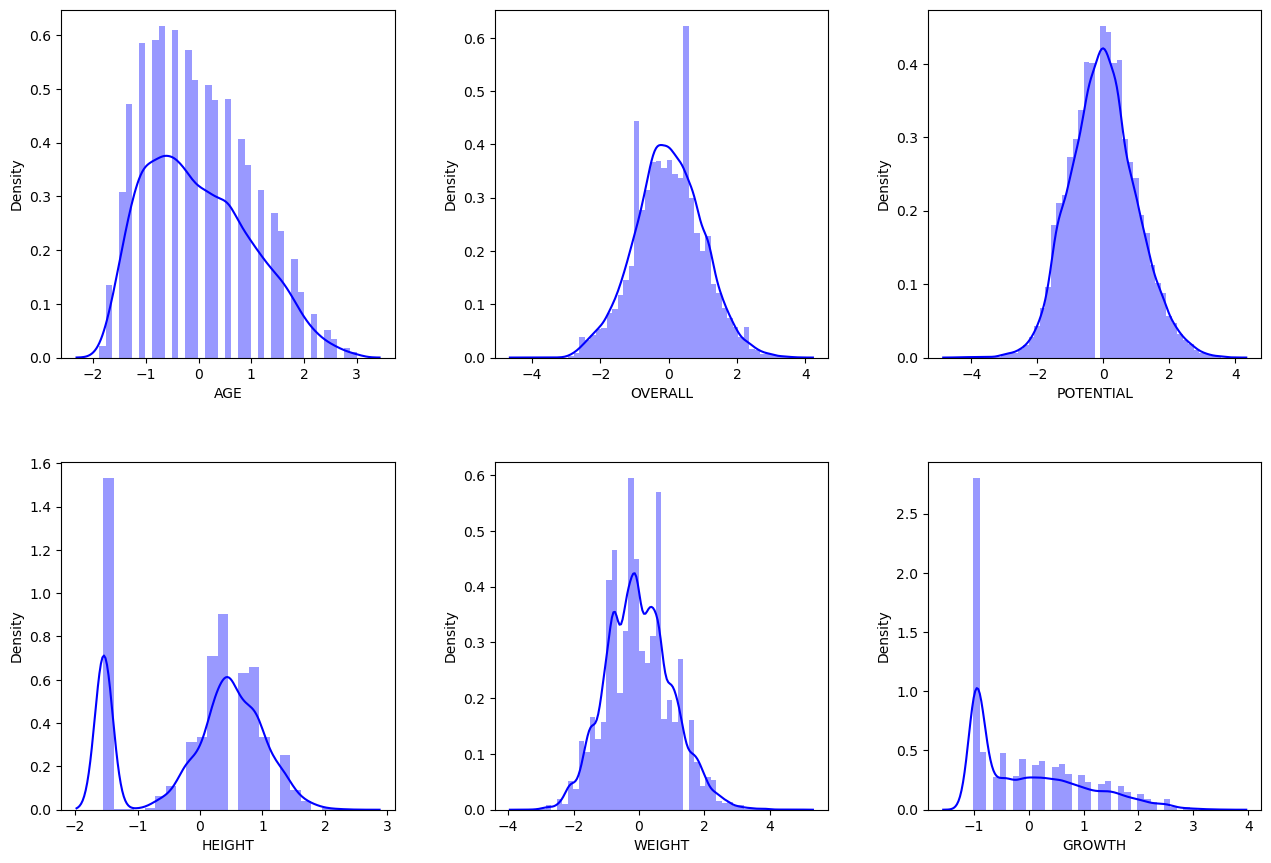

(17125, 12) (17104,)


In [58]:
df_object_selected=df_object[['BEST_POSITION','FOOT']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH']]
df_MODEL=pd.concat([df_object_selected, df_numeric_selected], axis=1)
df_MODEL.reset_index()
df_MODEL.shape

#Try removing the players with AGE in as outliers
# remove them from the data
iqr = np.percentile(df_MODEL['AGE'],75) - np.percentile(df_MODEL['AGE'],25) # data['IC1'].quantile(0.75)
iqr
# define the limits
upper_limit = np.percentile(df_MODEL['AGE'],75) + 1.5*iqr
lower_limit = np.percentile(df_MODEL['AGE'],25) - 1.5*iqr
df_MODEL = df_MODEL[(df_numeric['AGE']>lower_limit) & (df_MODEL['AGE']<upper_limit)]


df_object_selected=df_MODEL[['BEST_POSITION','FOOT']]
df_numeric_selected=df_MODEL[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT', 'GROWTH']]

#I split VALUEt and the rest of numerical values to apply the scalers
X_Target=df_numeric_selected['VALUE']
df_numeric_Transformed=df_numeric_selected.drop(columns='VALUE')
df_numeric_Transformed.sample(4)

#Show the distributions in as a Standarized distribution. 
##There are different methods to do this transformation
#I use Standarization Standar_scaler to put the mean in 0

transformer = StandardScaler().fit(df_numeric_Transformed)
df_numeric_Transformed_2 = transformer.transform(df_numeric_Transformed)
df_numeric_Transformed = pd.DataFrame(df_numeric_Transformed_2, columns=df_numeric_Transformed.columns)

# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_Transformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid


# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_Transformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_Transformed[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

# Use the replace() method to map old categories to new categories
df_object_selected["BEST_POSITION"] = df_object_selected["BEST_POSITION"].replace(bp_mapping)
#df_object_selected.head()
df_object_selected["BEST_POSITION"].unique()
df_object_encoded = pd.get_dummies(df_object_selected, drop_first=False)
df_object_encoded.sample(5)

Y=X_Target
X=pd.concat([df_numeric_Transformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)

In [59]:
Y=X_Target
X=pd.concat([df_numeric_Transformed, df_object_encoded], axis=1)
X.reset_index()
print(X.shape,Y.shape)
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

(17125, 12) (17104,)


ValueError: Found input variables with inconsistent numbers of samples: [17125, 17104]